# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
exec(open('init_notebook.py').read())

current working dirE:\AV\DataSetExploration\drone-dataset-tools\src


In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")

from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(None)

# We have three types of preprocessed data:
1. Location (includes everything and is a large pickled file)
2. crossing csv (includes only pedestrians)
3. other csv (includes all other trajectories)
4. SceneData (seperate pickled file for each scene of a location)

## 1. Preprocessed Location Data

In [ ]:
from extractors.LocationData import LocationData
loc2dataFromFile = LocationData.load("../data/location-2", "2022-11-13-fps-2.5-all.dill")

In [ ]:
sceneData = loc2dataFromFile.getSceneData(10, 10, 5, refresh=False)
visualizer.showLocationSceneData(sceneData, onlyClipped=True, showOthers=True)

In [ ]:
sceneLocalDf = sceneData.getClippedOtherDfs() # others (vehicles, bicycles, trucks)
sceneLocalDf.head()

## 2 & 3, CSV files of pedestrian and other actor trajectories

In [ ]:
import pandas as pd
pedDf = pd.read_csv("../data/location-2/2022-11-13-fps-2.5-crossing.csv")
otherDf = pd.read_csv("../data/location-2/2022-11-13-fps-2.5-other.csv")

In [ ]:
pedDf.head()

In [ ]:
import pandas as pd
pedDf = pd.read_csv("../data/location-2/2022-11-19-fps-2.5-scene-31-pedestrians.csv")
otherDf = pd.read_csv("../data/location-2/2022-11-19-fps-2.5-scene-31-others.csv")
pedDf.head()

## 4 Preprocessed Scene Data
### 1. Loading SceneData Object

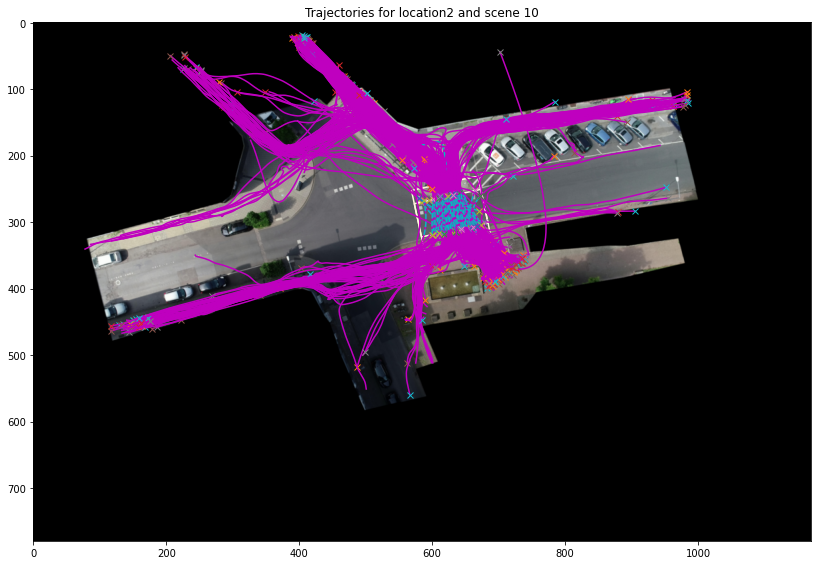

In [8]:
from extractors.LocationData import LocationData
sceneData = LocationData.load("../data/location-2/home", "2022-12-09-fps-5-scene-10.dill")
# scene10.backgroundImagePath = "G:AV datasets/inD-dataset-v1.0/data/18_background.png"
# scene10.sceneConfig
# scene10.orthoPxToMeter

visualizer.showLocationSceneData(sceneData, onlyClipped=False, showOthers=False)

In [ ]:
pedDf = sceneData.getPed
otherDf

### 2. Or load dataframes

In [8]:
import pandas as pd
pedDf = pd.read_csv("../data/location-2/2022-12-07-fps-5-scene-22-pedestrians.csv")
otherDf = pd.read_csv("../data/location-2/2022-12-07-fps-5-scene-22-others.csv")

In [19]:

visualizer.showLocationSceneData(scene10, onlyClipped=False, showOthers=False)

In [20]:
pedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
0,18,235,18001,22,9.0,8.845965,4.485159,1.263405,0.572902,-0.230607,0.419307
1,18,240,18001,22,9.0,8.590706,4.402693,1.276295,0.412328,-0.064447,0.802866
2,18,245,18001,22,9.0,8.330737,4.355752,1.299848,0.234706,-0.117765,0.888114
3,18,250,18001,22,9.0,8.061950,4.335745,1.343936,0.100036,-0.220440,0.673346
4,18,255,18001,22,9.0,7.781109,4.330627,1.404200,0.025591,-0.301324,0.372225


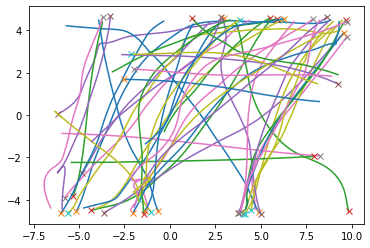

In [21]:
visualizer.showLocalTrajectories(pedDf, idCol="uniqueTrackId", xCol="sceneX", yCol="sceneY")

In [9]:

pedDf = trajDf.iloc[0]
posX = trajDf[xCol]
posY = trackDf[yCol]
for Point(x, y) as p in zip(posX, posY):
    print(p)
    break


SyntaxError: invalid syntax (<ipython-input-9-737379ccc6e8>, line 4)